# <font color='pink' size='6'>All Missions Space from 1957</font>

### Saaalve galera mbora aprender um pouco mais com os dados que temos a nossa disposição no Kaggle, eu como sendo um fascinado pela astrofísica decidi pegar os dados de todas as missões para o espaço desde 1957.
### Mbora então ver e aprender um pouco mais sobre como fazer análise exploratória dos dados com Python huhuh :) e já coletar insights
### Link do dataset: https://www.kaggle.com/agirlcoding/all-space-missions-from-1957 e simboraaa.

# <font color='pink'>Coleta dos Dados</font>

#### Os dados que iremos utilizar estão no link acima o que você vai fazer é baixar e descompactar, ao baixr ele você pode escolher o formato csv.

# Bibliotecas

In [22]:
# Biblioteca para análise de dados e estrutura de dados com alta performance e também fácil de usar.
import pandas as pd 

# Biblioteca seaborn para visualização de dados, possibilitando a criação de gráficos sofisticados
import seaborn as sns 

# E vamos usar seaborn para que toda vez que imprimirmos os gráfico possamos ter as linhas de grades 
# e um fundo branco para melhor entendimento das informações que serão apresentadas.
sns.set(style = 'whitegrid') 

# Para ingnorar possíveis warnings
import warnings
warnings.filterwarnings('ignore')

# E além disso também vamos chamar o conjunto de funções do matplotlib, o pyplot permite criar figuras e gráficos
import matplotlib.pyplot as plt 

# E por último, se quisermos visualizar aqui no jupyter notebook os gráficos que iremos criar precisaremos desse carinha
%matplotlib inline 

# <font color='pink'>Carregando os Dados</font>

#### Para carregarmos um arquivo no formato csv basta chamarmos a biblioteca pandas que também irá nos ajudar no decorrer de nossas análises

#### Feito isso iremos carregar o arquivo, lembrando que o arquivo tem que estar no mesmo diretório onde está o seu jupyter notebook
#### Se ele estiver em outro diretório basta colocar o caminho completo.

In [23]:
# Carregando o arquivo, aqui o processo é simples basta executar essa linha de código
df = pd.read_csv('files/datasets_828921_1417131_Space_Corrected.csv')

# <font color='pink'>Análise Exploratória</font>

### Entendendo como estão estruturado os Dados e organizá-los

In [24]:
# Para vermos se o arquivo foi carregado com sucesso executamos
df.head() # O método head() por padrão imprime as 5 primeiras linhas do dataset

,Unnamed: 0,Unnamed: 0.1,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [25]:
# Como vimos, temos o nosso arquivo lindo e gordinho, agora vamos ver o formato dele
# Temos (linhas:4324, colunas: 9)
df.shape

(4324, 9)

In [26]:
# Como podemos ver, o nosso DataFrame tem colunas repetidas né, podemos selecionar somente as colunas que iremos usar
# Vamos visualizar todas as colunas do dataset
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Company Name', 'Location', 'Datum',
       'Detail', 'Status Rocket', ' Rocket', 'Status Mission'],
      dtype='object')

#### Dá pra vermos que as colunas Unnamed: 0', 'Unnamed: 0.1 não iremos precisar uma vez que eles estão duplicadas e já temos a coluna index do próprio pandas, e temos também a coluna 'Rocket' que está com um espaçamento à esquerda, isso pode nos dificultar quando formos analisar essa coluna. 
#### Então o próximo passo vai ser filtrar somente as colunas que iremos usar e renomear a coluna ' Rocket' para 'Cost_Mission'.

#### A coluna 'Rocket' ela apresenta o custo total das missões em milhões de dólares.

In [27]:
# Renomeando a coluna 
df.rename(columns = {' Rocket':'Cost_Mission'}, inplace = True) # A coluna 'Rocket' representa o custo total das missões em dólares, de acordo com o dicionário do dataset

# Selecionando as colunas que iremos usar
df = df[['Company Name', 'Location', 'Datum', 'Detail', 'Status Rocket', 'Cost_Mission', 'Status Mission']]

# Visualizando o df com os dados filtrados e ajustado
df.head()

,Company Name,Location,Datum,Detail,Status Rocket,Cost_Mission,Status Mission
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


### Visualizando os tipos de dados do nosso DataFrame, é importante saber os tipos de dados pois vai nos ajudar mais pra frente quando a gente quiser fazer cálculos com os dados

In [28]:
# Visualizando o tipo de dados das colunas do DF
df.dtypes

Company Name      object
Location          object
Datum             object
Detail            object
Status Rocket     object
Cost_Mission      object
Status Mission    object
dtype: object

#### Percebemos que as colunas 'Cost_Mission' e 'Datum' estão com tipos/formato de dados errado, mbora corrigí-los.

## * <font color = 'red' size = 4>[IMPORTANTE]</font> Lembrando que os dados da coluna 'Location' representa os países onde foram feitos os lançamentos, não necessáriamente que o país onde foi feito o lançamento seja o país responsável por toda a missão.

In [29]:
# Substituindo os caracters da coluna 'Cost_Mission'
df['Cost_Mission'] = df['Cost_Mission'].str.replace(',', '')

# Alterando o tipo de dados da coluna 'Cost_Mission' de object para float
df['Cost_Mission'] = df['Cost_Mission'].astype(float)

# Alterando o formato da coluna 'Datum' para tipo de data e formato de fácil compreensão
df['Datum'] = pd.to_datetime(df['Datum']).apply(lambda x: x.strftime("%Y-%m-%d %H:%M:%S"))

# Fatiando a coluna 'Location' para pegarmos somente o país 
df['Location'] =  [val[-1] for val in df.Location.str.split(',')]

# Visualizando os dados
df.head()

,Company Name,Location,Datum,Detail,Status Rocket,Cost_Mission,Status Mission
0,SpaceX,USA,2020-08-07 05:12:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success
1,CASC,China,2020-08-06 04:01:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,USA,2020-08-04 23:57:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,Kazakhstan,2020-07-30 21:25:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success
4,ULA,USA,2020-07-30 11:50:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success


#### Agora que temos os dados do jeito que a gente gostaria, vamos dar uma olhada se temos dados nulos no nosso dataset, isso é muito comum acontecer, pode ser um usuário que esquece de preencher os campos ou problema na aplicação também.

In [30]:
# Visualizando valores nulos no dataset
df.isnull().sum()

Company Name         0
Location             0
Datum                0
Detail               0
Status Rocket        0
Cost_Mission      3360
Status Mission       0
dtype: int64

#### Temos dados nulos no nosso DataFrame veja na coluna 'Cost_Mission' são 3360 nulos, então mbora tratá-los:
#### Existem várias formas de tratar dados nulos, só devemos tomar muito cuidado para não mudarmos muito o nosso dataset ao ponto de não condizer com os fatos reais.

#### No caso desse dataset percebemos que algumas empresas não declararam o custo de suas missões, nesse caso iremos usar um método que vai pegar a todos os valores NaN dessa coluna e substituir por 0. Mbora lá...

In [31]:
# Filtrando os valores NaN da coluna 'Cost_Mission' e substituí-los por 0
df.Cost_Mission.fillna(0, inplace = True)

In [32]:
# Visualizando o dataset
df.head()

,Company Name,Location,Datum,Detail,Status Rocket,Cost_Mission,Status Mission
0,SpaceX,USA,2020-08-07 05:12:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success
1,CASC,China,2020-08-06 04:01:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,USA,2020-08-04 23:57:00,Starship Prototype | 150 Meter Hop,StatusActive,0.00,Success
3,Roscosmos,Kazakhstan,2020-07-30 21:25:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success
4,ULA,USA,2020-07-30 11:50:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success


#### Agora que o nosso dataset está sem dados nulos e estão organizados como gostaríamos, podemos fazer algumas perguntas começando com:
## * Desde 1957 quantas Missões foram realizadas até hoje (2020), apresentando por status da missão?

In [33]:
# Temos três tipos de status: 'Success', 'Failure', 'Prelaunch Failure' e 'Partial Failure'

# Visualizando a quantidade de missões por status
pd.DataFrame(df['Status Mission'].value_counts())

,Status Mission
Success,3879
Failure,339
Partial Failure,102
Prelaunch Failure,4


#### Podemos ver que grande parte das missões realizadas foram bem sucedidas, graças à Deus! Hehehehe
#### Mas para deixarmos isso mais interessante que tal já prepararmos esse insight bonitinho para o nosso report?

#### O processo é simples mbora lá...

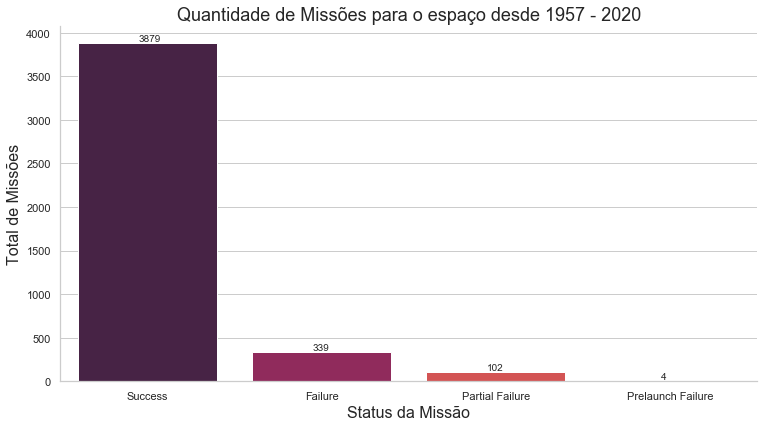

In [34]:
# Nesse caso iremos usar um gráfico de categoria, que é o catplot e é bem bacana para o que a gente precisa agora
# e iremos colocar pimenta por cima pra ficar ainda mais gostoso.

# Definindo os valores para os eixos x e y
x = df['Status Mission'].value_counts().index
y = df['Status Mission'].value_counts()

# Criando o gráfico
g = sns.catplot(x = x, y = y, data = df, kind = 'bar', aspect = 1.9, height = 5.5, palette = 'rocket')

# Título do gráfico
g.ax.set_title('Quantidade de Missões para o espaço desde 1957 - 2020', fontdict = {'size':18})

# Customizando os eixos (x & y)
g.ax.xaxis.set_label_text('Status da Missão', fontdict = {'size':16})
g.ax.yaxis.set_label_text('Total de Missões', fontdict = {'size': 16})

# Imprimindo a contagem por cima das barras do gráfico
for i in g.ax.patches:
    g.ax.annotate((int(i.get_height())), 
    (i.get_x()+0.35, 
    i.get_height()+20))

#### Próxima pergunta?

# * Distribuição das Missões de Sucesso com base no Ano de Lançamento?

#### O Histograma nos mostra que entre 1964 à 1977 tivemos uma corrida interssante nos lançamentos e entre 2015 e 2020 o número de missões para o espaço cresceu novamente.

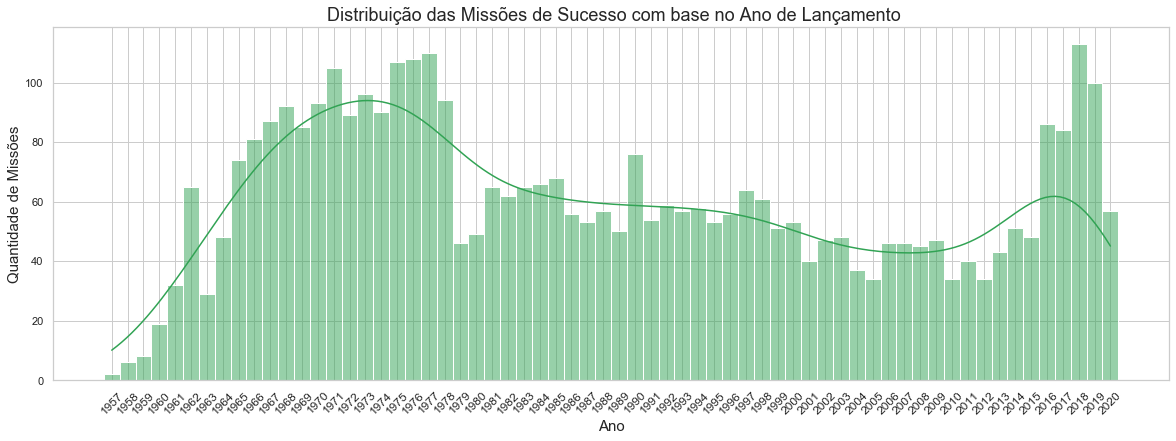

In [35]:
# Distribuição das Missões de Sucesso com base no Ano de Lançament

# Filtrando as missões que foram sucesso
df_Success = df[df['Status Mission'] == 'Success']

# Na coluna 'Datum' iremos pegar somente o ano de laçamento
df_Success.Datum = pd.to_datetime(df_Success['Datum']).apply(lambda x: x.strftime('%Y'))

# Definindo o tamanho do gráfico
fig, x = plt.subplots(figsize=(20, 6.5))
g = sns.histplot(x = df_Success.Datum.sort_values(), data = df_Success, color='#31a354', kde = True)

# Título do gráfico
g.set_title(' Distribuição das Missões de Sucesso com base no Ano de Lançamento', fontdict = {'size':18})

# Customizando os eixos (x e y)
g.xaxis.set_label_text('Ano', fontdict = {'size':15})
g.yaxis.set_label_text('Quantidade de Missões', fontdict = {'size':15})

# Customizando os rótulos do gráfico
labels = df_Success.Datum.sort_values().unique()
g.set_xticklabels(labels, rotation = 45, ha = 'center', fontdict = {'size':12})
plt.show();

#### Vamos à próxima pergunta?
## * Quais os 10 países que mais tiveram sucesso nos lançamentos?

#### A Rússia lidera a lista do TOP 10 seguido dos EUA e em décimo lugar está ocupado por Israel, tendo realizado 9 lançamentos bem sucedidos.

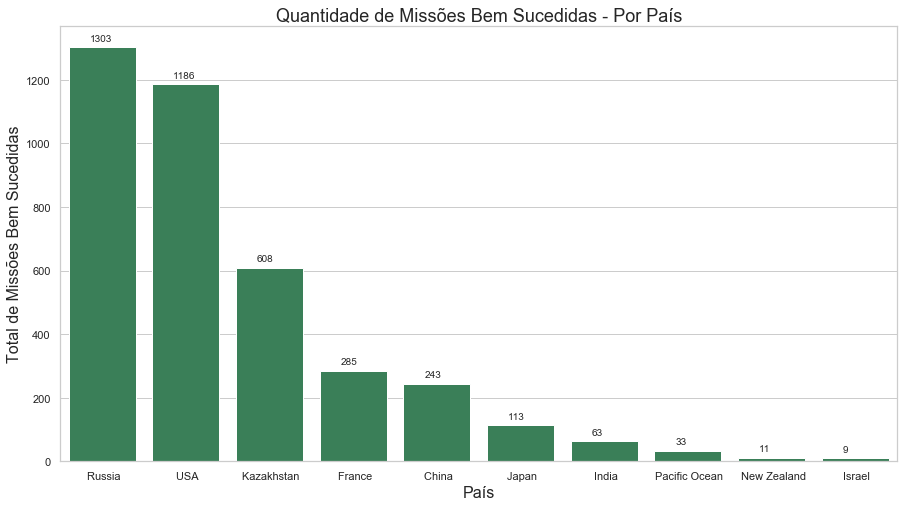

In [36]:
# Vamos listar o TOP dos 10 países que mais tiveram lançamentos bem sucedidos

# Filtrando todos os lançamentos que foram bem sucedido e pegando os 10 que foram bem sucedidos
success = df[df['Status Mission'] == 'Success']
success = pd.DataFrame(success.Location.value_counts().head(10))

# Criando a figura do gráfico e definindo o tamanho
plt.figure(figsize=(15, 8))

# Criando o gráfico
g = sns.barplot(x = success.index, y = success.Location, color = 'seagreen')

# Adicionando título ao nosso gráfico
plt.title('Quantidade de Missões Bem Sucedidas - Por País', fontdict = {'size':18})

# Definindo o formato e os valores dos eixos x e y
plt.xlabel('País', fontdict = {'size':16})
plt.ylabel('Total de Missões Bem Sucedidas', fontdict = {'size':16})

# Imprimindo a contagem por cima das barras do gráfico
for i in g.patches:
    g.annotate((int(i.get_height())), 
    (i.get_x()+0.25, 
    i.get_height()+20))

#### Próxima pergunta...
## * Quais são os países que foram mal sucedidos em seus lançamentos?

#### Lembrando que aqui estamos desconsiderando todos todos status de lançamentos diferente de 'Success'
#### O gráfico nos mostra que os EUA lidera como o país que mais teve lançamentos mal sucedido seguido do Kazakhstan e Rússia

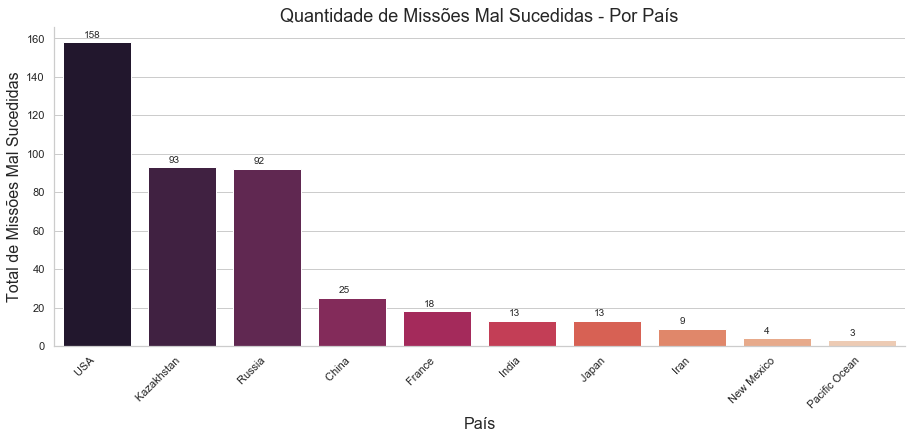

In [37]:
# vamos listar os 10 país que mais tiveram lançamentos mal sucedidos

# Filtrando todos os dados do dataset com status de lançamento diferente de 'Success'
failure = df[df['Status Mission'] != 'Success']
failure = pd.DataFrame(failure.Location.value_counts().head(10))

# Criando o gráfico
g = sns.catplot(x = failure.index, y = failure.Location, data = df, aspect = 2.5, kind = 'bar', palette = 'rocket')

# Adicionando título ao gráfico 
g.ax.set_title('Quantidade de Missões Mal Sucedidas - Por País', fontdict = {'size':18})

# Definindo os eixos x & y
g.ax.xaxis.set_label_text('País', fontdict = {'size':16})
g.ax.yaxis.set_label_text('Total de Missões Mal Sucedidas', fontdict = {'size':16})

# Ajustando os rótulos eixo x para 45 graus
g.set_xticklabels(rotation = 45, ha = 'right')

# Imprimindo a contagem por cima das barras do gráfico
for i in g.ax.patches:
    g.ax.annotate((int(i.get_height())), 
    (i.get_x()+0.25, 
    i.get_height()+2.5))

#### Boa! Você aprendeu um pouco mais sobre análise exploratória e criação de gráficos, recomendo que faça isso de novo e de novo até ficar craque, tenta explorar com outros tipos de gráficos do Seaborn link: https://seaborn.pydata.org/ lá você terá outros gráficos tenta explorar mais, o segredo está na prática, então pratique.

#### Próxima pergunta?

## * Custo médio de uma missão por país, bem como o status da missão?

#### Primeiro vamos calcular a média de custo de missões por país

In [38]:
# Calculando a média de custo por por missão

# Definindo a variável para fazermos o pivot 
var = pd.DataFrame()

# Selecionando somente o custo de missiões maior que zero
df_Cost_Mission = df[df['Cost_Mission'] > 0]

# Selecionando os dados e aplicando a média
for b in list(df_Cost_Mission['Location'].unique()):
    for v in list(df_Cost_Mission['Status Mission'].unique()):
        z = df_Cost_Mission[(df_Cost_Mission['Location'] == b) & (df_Cost_Mission['Status Mission'] == v)]['Cost_Mission'].mean()
        var = var.append(pd.DataFrame({'Location':b , 'Status Mission':v , 'avgCost_Mission':z}, index=[0]))

# Resetando o index do nosso novo conjunto de dados        
var = var.reset_index(drop = True)

# Filtrando os valores e formatos
var['avgCost_Mission'].fillna(0,inplace=True)
var['avgCost_Mission'].isnull().value_counts()
var['avgCost_Mission'] = var['avgCost_Mission'].astype(int)

# Visualizando as 5 primeiras linhas do novo conjunto de dados
pd.DataFrame(var.head())

,Location,Status Mission,avgCost_Mission
0,USA,Success,221
1,USA,Failure,86
2,USA,Partial Failure,259
3,USA,Prelaunch Failure,62
4,China,Success,40


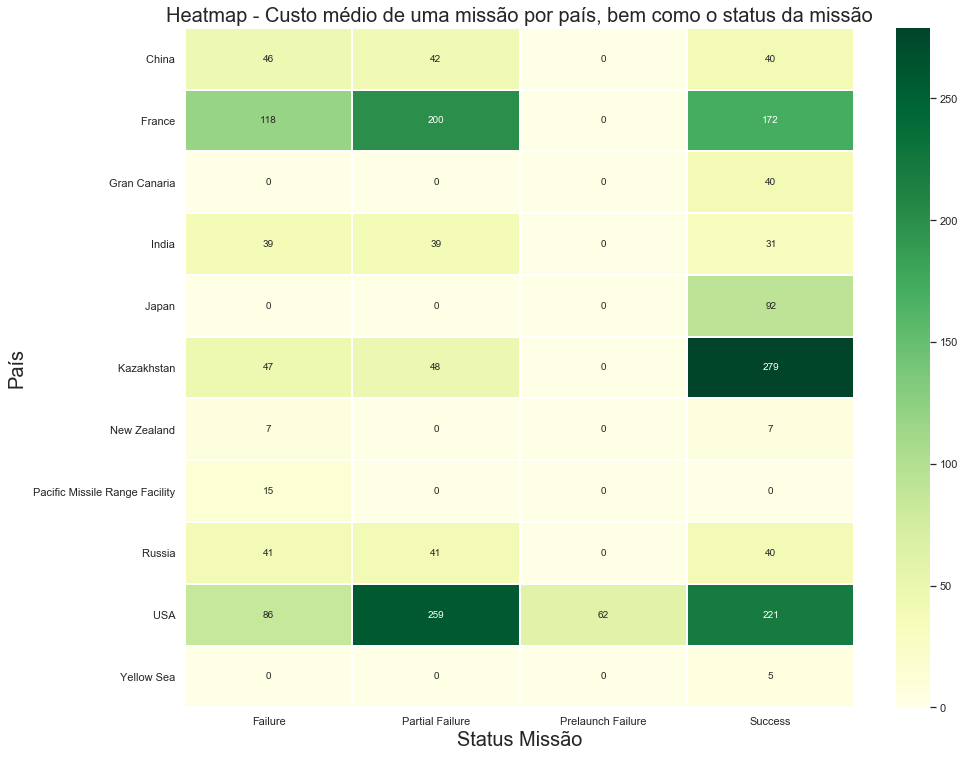

In [39]:
# Custo médio de uma missão por país, bem como o status da missão?

# Selecionando as colunas do nosso novo dataset
tri = var.pivot('Location', 'Status Mission', 'avgCost_Mission')

# Criando a figura para o gráfico
fig, ax = plt.subplots(figsize=(15, 12.5))

# Criando o gráfico
sns.heatmap(tri, linewidths=1, cmap='YlGn', annot=True, ax=ax, fmt='d')

# Definindo o título do gráfico
ax.set_title('Heatmap - Custo médio de uma missão por país, bem como o status da missão', fontdict={'size':20})

# Adicionando título nos eixos x e y
ax.xaxis.set_label_text('Status Missão',fontdict= {'size':20})
ax.yaxis.set_label_text('País',fontdict= {'size':20})

# Plotando o gráfico
plt.show()

#### Próxima pergunta...
## * Qual é o TOP 10 dos países que mais gastaram em suas missões?
#### Lembrando que aqui o valor da missão está sendo representando em milhões de dólares.

#### E os EUA é o pais que lidera disparado se tratando de maiores gastos em missões para o espaço

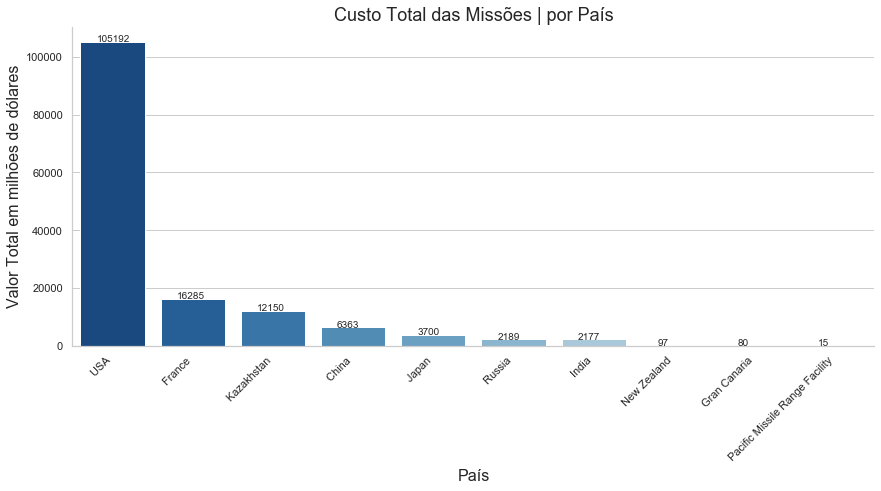

In [40]:
# Listando o TOP 10 dos países que mais gastaram com missões para o espaço

# Agrupando os dados por local e por total de missões
cost_mission = df.groupby('Location').Cost_Mission.sum()

# Adicionando o resultado dos filtros nas variáveis x e y
y = cost_mission.sort_values(ascending = False).head(10).values
x = cost_mission.sort_values(ascending = False).head(10).index

# Criando o gráfico
g = sns.catplot(x = x, y = y, data = df, aspect = 2.5, kind = 'bar', palette = 'Blues_r')

# Adicionando título ao gráfico
g.ax.set_title('Custo Total das Missões | por País', fontdict = {'size':18})

# Definindo os dados para o eixo x e y
g.ax.xaxis.set_label_text('País', fontdict = {'size':16})
g.ax.yaxis.set_label_text('Valor Total em milhões de dólares', fontdict = {'size':16})

# Ajustando os rótulos eixo x para 45 graus
g.set_xticklabels(rotation = 45, ha = 'right')

# Imprimindo a contagem por cima das barras do gráfico
for i in g.ax.patches:
    g.ax.annotate((int(i.get_height())), 
    (i.get_x()+0.20, 
    i.get_height()+3.5))

# Fim...